# Technical Analysis: Thorough Comparison between Conjugate Gradient and Polak Ribiere Methods 

#### Authors:
* Ridha Alkhabaz (ridhama2)
* Ali Albazroun (aia)
* Priyam  Mazumdar (priyamm2)

#### Outline:

**1- Introduction**

**2- Experiments**

**3- Results**

**4- Conclusions**

#### Introduction:

In this assignment, we are trying to determine whether **Conjugate Gradient** is better than **Polak Ribiere** methods. Our chosen objective are all well-behaved, continous, and mostly differentiable. Moreover, they all share the same minimum, which is $x = [0]^d$, where d is the dimension. Here is a list of our chosen objective functions:

* [Rastrigin Functions](https://en.wikipedia.org/wiki/Rastrigin_function): It is non-convex function with the following form:
$$ f(x) = An +  \sum_{i=1}^{n} (x_{i}^{2} - A cos(2 \pi x_i)), \quad where \quad A \in \mathbb{R}, n \in \mathbb{N}, and \quad x \in \mathbb{R}^{n}$$
* [Bent Cigar Function](https://al-roomi.org/benchmarks/unconstrained/n-dimensions/164-bent-cigar-function): It is a convex function with the following function:
$$ f(x) = x_{1}^{2} + 10^{6}\sum_{i=1}^{n} x_{i}^{2}, \quad where \quad n \in \mathbb{N}, and \quad x \in \mathbb{R}^{n}$$
* [Rotated Hyper-Ellipsoid Function](https://www.sfu.ca/~ssurjano/rothyp.html): It is a convex function with the following form:
$$ f(x) = \sum_{i=1}^{n} \sum_{j=1}^{i} x_{j}^{2}, \quad where \quad n \in \mathbb{N}, and \quad x \in \mathbb{R}^{n}$$


Since most of the team members work in either non-continoues space or discrete, we opted to use famous objective functions to evaluate optimization techniques. 

#### Experiments:

In [1]:
# imports:
from scipy import optimize
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import sys, os

In [2]:
# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

def Rastrigin(x):
    z = 0 
    for i in x:
        z += i**2 - 0.5*np.cos(2*np.pi*i) + 0.5
    return z

def ellipse(x):
    dim = len(x)
    z = 0
    for i in range(dim):
        for j in range(i):
            z += (x[j]**2)
    return z
            
def cigar(x):
    z = x[0]**2
    for i in x[1:]:
        z += (10**6) * i**2
    return z

def matyas(x):
    return 0.26 * np.sum(x**2) - 0.48*np.prod(x) + 1

def rosenbrock(x):
    sum = 0
    for i in range(len(x) // 2):
        sum += 100*(x[2*i-1]**2 - x[2*i])**2 + (x[2*i-1] - 1)**2
    return sum
    

def opts_test(function, samples=50, dim=100):
    pcg_x_outs, best_pcgs, num_pcg_iterations = [], [], []
    cg_x_outs, best_cgs, num_cg_iterations = [], [], []
    
    for i in tqdm(range(samples)):
        blockPrint()
        init = np.random.randn((dim))
    
        pcg = optimize.fmin_cg(function, x0=init, full_output=True, retall=True)
        pcg_x_out, best_pcg, _, _, _, pcg_iterations = pcg
        pcg_iterations = len(pcg_iterations) - 1

        init = np.random.randn((dim))
        cg = optimize.minimize(function, x0=init, method="CG")
        cg_x_out, best_cg, cg_iterations = cg["x"], cg["fun"], cg["nit"]
    
        pcg_x_outs.append(pcg_x_out)
        best_pcgs.append(best_pcg)
        num_pcg_iterations.append(pcg_iterations)
    
        cg_x_outs.append(cg_x_out)
        best_cgs.append(best_cg)
        num_cg_iterations.append(cg_iterations)

    return pcg_x_outs, best_pcgs, num_pcg_iterations, cg_x_outs, best_cgs, num_cg_iterations


In [11]:
rpcg_x_outs, rbest_pcgs, rnum_pcg_iterations, rcg_x_outs, rbest_cgs, rnum_cg_iterations = opts_test(Rastrigin, samples=100)
epcg_x_outs, ebest_pcgs, enum_pcg_iterations, ecg_x_outs, ebest_cgs, enum_cg_iterations = opts_test(ellipse, samples=100)
cpcg_x_outs, cbest_pcgs, cnum_pcg_iterations, ccg_x_outs, cbest_cgs, cnum_cg_iterations = opts_test(cigar, samples=100)
mpcg_x_outs, mbest_pcgs, mnum_pcg_iterations, mcg_x_outs, mbest_cgs, mnum_cg_iterations = opts_test(matyas, samples=100)
ropcg_x_outs, robest_pcgs, ronum_pcg_iterations, rocg_x_outs, robest_cgs, ronum_cg_iterations = opts_test(rosenbrock, samples=100)

results = {"rastrigin": [rpcg_x_outs, rbest_pcgs, rnum_pcg_iterations, rcg_x_outs, rbest_cgs, rnum_cg_iterations], 
           "ellipse": [epcg_x_outs, ebest_pcgs, enum_pcg_iterations, ecg_x_outs, ebest_cgs, enum_cg_iterations],
           "cigar": [cpcg_x_outs, cbest_pcgs, cnum_pcg_iterations, ccg_x_outs, cbest_cgs, cnum_cg_iterations], 
           "matyas": [mpcg_x_outs, mbest_pcgs, mnum_pcg_iterations, mcg_x_outs, mbest_cgs, mnum_cg_iterations], 
           "rosenbrock": [ropcg_x_outs, robest_pcgs, ronum_pcg_iterations, rocg_x_outs, robest_cgs, ronum_cg_iterations]}

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
with open('results_sam100_dim100.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [13]:
rpcg_x_outs, rbest_pcgs, rnum_pcg_iterations, rcg_x_outs, rbest_cgs, rnum_cg_iterations = opts_test(Rastrigin, samples=100, dim=1000)
# epcg_x_outs, ebest_pcgs, enum_pcg_iterations, ecg_x_outs, ebest_cgs, enum_cg_iterations = opts_test(ellipse, samples=50, dim=1000)
cpcg_x_outs, cbest_pcgs, cnum_pcg_iterations, ccg_x_outs, cbest_cgs, cnum_cg_iterations = opts_test(cigar, samples=100, dim=1000)
mpcg_x_outs, mbest_pcgs, mnum_pcg_iterations, mcg_x_outs, mbest_cgs, mnum_cg_iterations = opts_test(matyas, samples=100, dim=1000)
ropcg_x_outs, robest_pcgs, ronum_pcg_iterations, rocg_x_outs, robest_cgs, ronum_cg_iterations = opts_test(rosenbrock, samples=100,  dim=1000)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
results = {"rastrigin": [rpcg_x_outs, rbest_pcgs, rnum_pcg_iterations, rcg_x_outs, rbest_cgs, rnum_cg_iterations], 
#            "ellipse": [epcg_x_outs, ebest_pcgs, enum_pcg_iterations, ecg_x_outs, ebest_cgs, enum_cg_iterations],
           "cigar": [cpcg_x_outs, cbest_pcgs, cnum_pcg_iterations, ccg_x_outs, cbest_cgs, cnum_cg_iterations], 
           "matyas": [mpcg_x_outs, mbest_pcgs, mnum_pcg_iterations, mcg_x_outs, mbest_cgs, mnum_cg_iterations], 
           "rosenbrock": [ropcg_x_outs, robest_pcgs, ronum_pcg_iterations, rocg_x_outs, robest_cgs, ronum_cg_iterations]}

In [10]:
with open('results_sam100_dim1000_noellipse.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x19357d580>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/signal/lib/python3.11/site-packages/matplotlib/transforms.py", line 209, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
                                                        ^^^^^^
KeyboardInterrupt: 


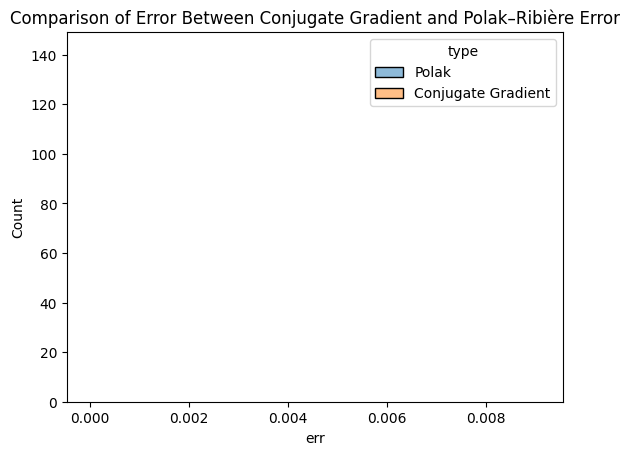

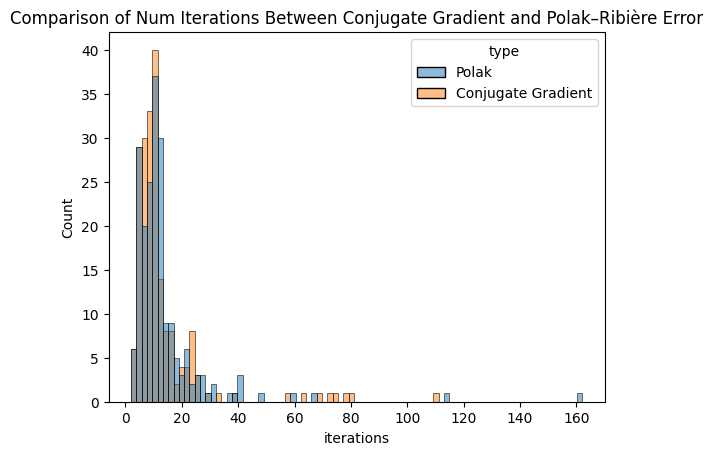

In [71]:
def plot_results(pcg_err, pcg_iterations, cg_err, cg_iterations):
    pcg = pd.DataFrame.from_dict({"err": pcg_err, 
                                  "iterations": pcg_iterations})
    pcg["type"] = "Polak"

    cg = pd.DataFrame.from_dict({"err": cg_err, 
                                  "iterations": cg_iterations})
    
    cg["type"] = "Conjugate Gradient"

    results = pd.concat([pcg, cg], axis=0)

    sns.histplot(data=results, x='err', hue='type', alpha=0.5)
    plt.title("Comparison of Error Between Conjugate Gradient and Polak–Ribière Error")
    plt.show()
    
    sns.histplot(data=results, x='iterations', hue='type', alpha=0.5)
    plt.title("Comparison of Num Iterations Between Conjugate Gradient and Polak–Ribière Error")
    plt.show()


plot_results(mbest_pcgs, mnum_pcg_iterations, mbest_cgs, mnum_cg_iterations)


##### References:
* https://indrag49.github.io/Numerical-Optimization/conjugate-gradient-methods-1.html
* https://docs.scipy.org/doc/scipy/reference/optimize.html
